In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn import tree
from sklearn import ensemble
warnings.filterwarnings('ignore')

# Steph Curry Statistical Analysis
---

In [176]:
reg_szn = pd.read_csv("../data/Stephen_Curry_Regularseason_Stats.csv")
sns.set(rc = {'figure.figsize':(15,8)})

In [177]:
twentyone = reg_szn[reg_szn['Season_year'] == '2020-2021']
w_l_converted_21 = twentyone['Result'].eq('W').mul(1)
twentyone['Result'] = w_l_converted_21
twentyone

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
698,2020-2021,Regular,Sun 5/16,MEM,1,113,101,40.0,16-36,16,...,5,6,83.3,7,9,1,1,2,7,46
699,2020-2021,Regular,Tue 5/11,PHX,1,122,116,37.0,7-22,7,...,6,6,100.0,3,6,0,1,2,3,21
700,2020-2021,Regular,Mon 5/10,UTA,1,119,116,37.0,11-25,11,...,11,12,91.7,4,6,0,2,1,3,36
701,2020-2021,Regular,Sat 5/8,OKC,1,136,97,29.0,14-26,14,...,10,10,100.0,5,2,0,1,2,1,49
702,2020-2021,Regular,Thu 5/6,OKC,1,118,97,31.0,11-21,11,...,6,7,85.7,4,7,0,1,2,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,0,98,123,34.0,9-20,9,...,4,4,100.0,8,5,0,0,1,1,26
757,2020-2021,Regular,Tue 12/29,DET,1,116,106,35.0,9-17,9,...,8,8,100.0,5,6,0,2,5,8,31
758,2020-2021,Regular,Sun 12/27,CHI,1,129,128,36.0,11-25,11,...,9,9,100.0,2,6,2,2,1,4,36
759,2020-2021,Regular,Fri 12/25,MIL,0,99,138,29.0,6-17,6,...,5,5,100.0,4,6,0,1,2,2,19


In [178]:
reg_szn.columns

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS'],
      dtype='object')

## Data Cleansing and Pipelines

In [179]:
def convert_WL(df):
	w_l_converted = df['Result'].eq('W').mul(1)
	df['Result'] = w_l_converted
	return df

In [180]:
def add_advanced_stats(df, trip_dub=False):
    df['AST/TO'] = df['AST']/df['TO']
    df['eFG%'] = (df['FGM'] + (0.5 * df['3PTM'])) / df['FGA'] * 100
    df['TS%'] = (df['PTS'] / (2 * (df['FGA'] + (0.44 * df['FTA'])))) * 100
    if trip_dub:
        df['Triple Double'] = ((df['PTS'] >= 10) & (df['REB'] >= 10) & (df['AST'] >= 10)).astype(int)
    df['Game Score'] = df['PTS'] + (df['FGM'] * 0.4) + (df['FGA'] * -0.7) + ((df['FTA'] - df['FTM']) * -0.4) + (df['REB']) + df['STL'] + (df['AST'] * 0.7) + (df['BLK'] * 0.7) + (df['PF'] * -0.4) - df['TO']
    return df

In [229]:
def numeric_normalize(df, per_minute=False):
    res = df['Result']
    df_numeric = df.select_dtypes([np.number])
    if per_minute:
        df_numeric = df_numeric.div(df['MIN'], axis=0)
    df_numeric_normalized = (df_numeric - df_numeric.mean()) / df_numeric.std()
    ret_df = df_numeric_normalized.drop('AST/TO', axis=1)
    ret_df['Result'] = res.eq('W').mul(1)
    return ret_df

In [182]:
def pipeline(df, per_minute=False):
	df = add_advanced_stats(df)
	df = numeric_normalize(df, per_minute)
	return df

In [183]:
reg_szn = add_advanced_stats(reg_szn)
reg_szn

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,AST,BLK,STL,PF,TO,PTS,AST/TO,eFG%,TS%,Game Score
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,8,1,2,0,2,42,4.000000,60.000000,69.352708,45.0
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,0,2,4,2,17,3.000000,36.666667,48.185941,16.1
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,7,0,1,2,5,25,1.400000,65.625000,67.060086,23.7
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,0,3,5,3,29,1.333333,65.789474,69.845857,29.5
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,14,0,7,4,4,27,3.500000,61.363636,61.363636,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2020-2021,Regular,Fri 1/1,POR,L,98,123,34.0,9-20,9,...,5,0,0,1,1,26,5.000000,55.000000,59.742647,25.7
757,2020-2021,Regular,Tue 12/29,DET,W,116,106,35.0,9-17,9,...,6,0,2,5,8,31,0.750000,67.647059,75.536062,23.9
758,2020-2021,Regular,Sun 12/27,CHI,W,129,128,36.0,11-25,11,...,6,2,2,1,4,36,1.500000,54.000000,62.154696,28.1
759,2020-2021,Regular,Fri 12/25,MIL,L,99,138,29.0,6-17,6,...,6,0,1,2,2,19,3.000000,41.176471,49.479167,15.9


## Exploratory Data Analysis

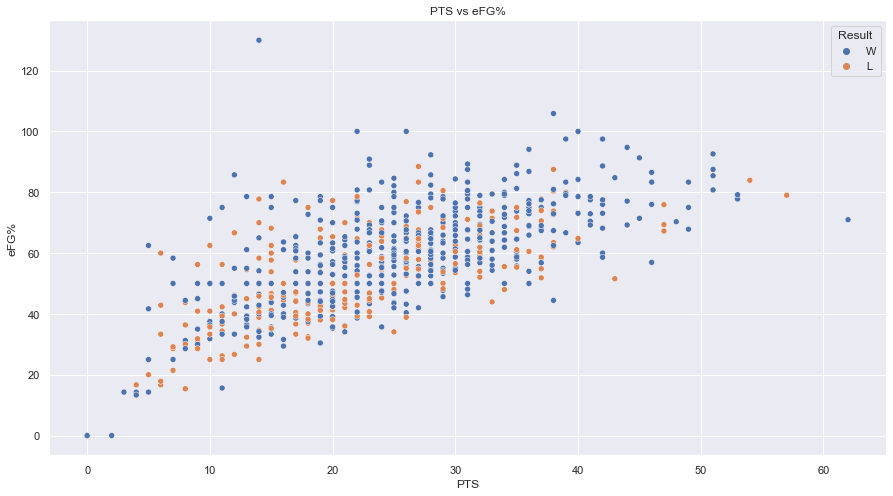

In [184]:
sns.scatterplot(data=reg_szn, x='PTS', y='eFG%', hue='Result');
plt.title('PTS vs eFG%');

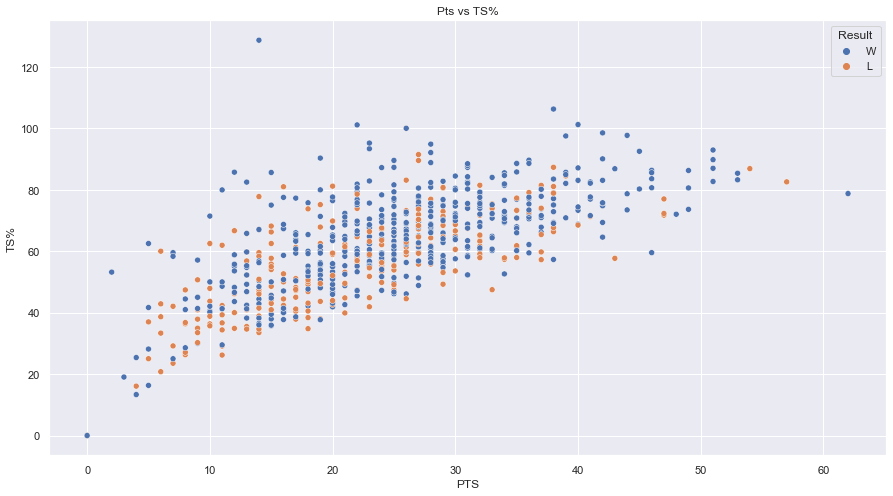

In [185]:
sns.scatterplot(data=reg_szn, x='PTS', y='TS%', hue='Result');
plt.title('Pts vs TS%');

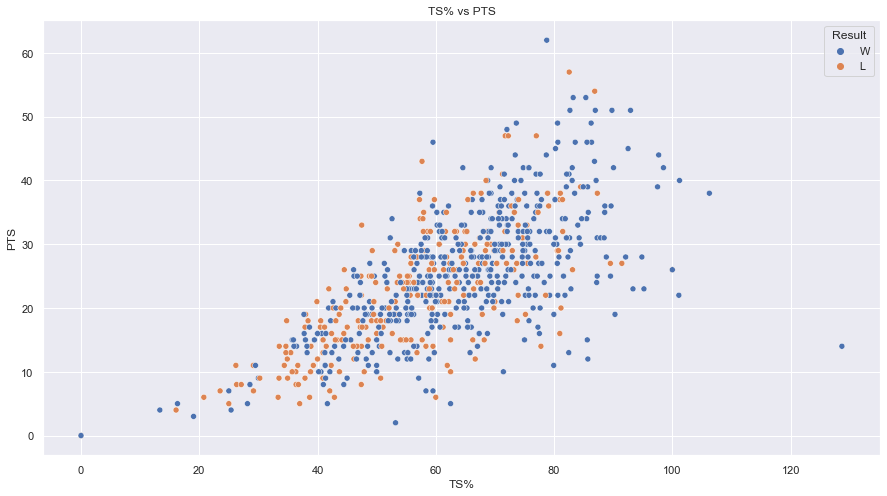

In [186]:
sns.scatterplot(data=reg_szn, x='TS%', y='PTS', hue='Result');
plt.title('TS% vs PTS');

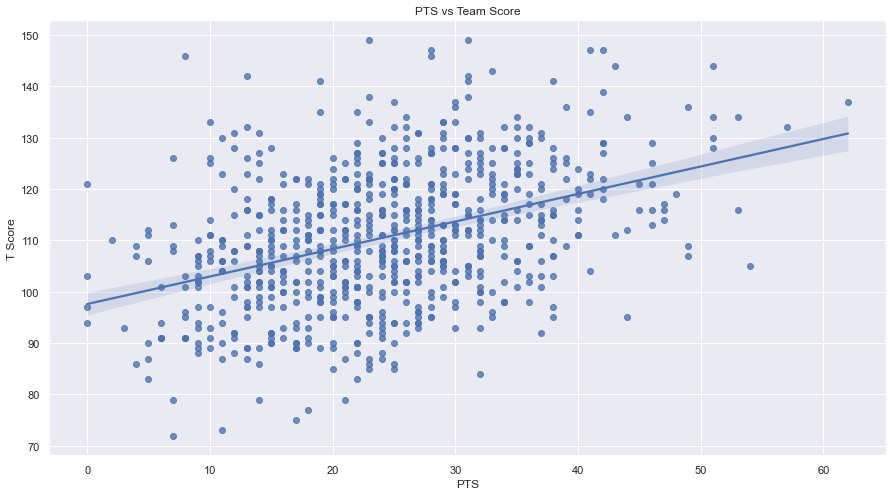

In [187]:
sns.regplot(data=reg_szn, x='PTS', y='T Score');
plt.title('PTS vs Team Score');

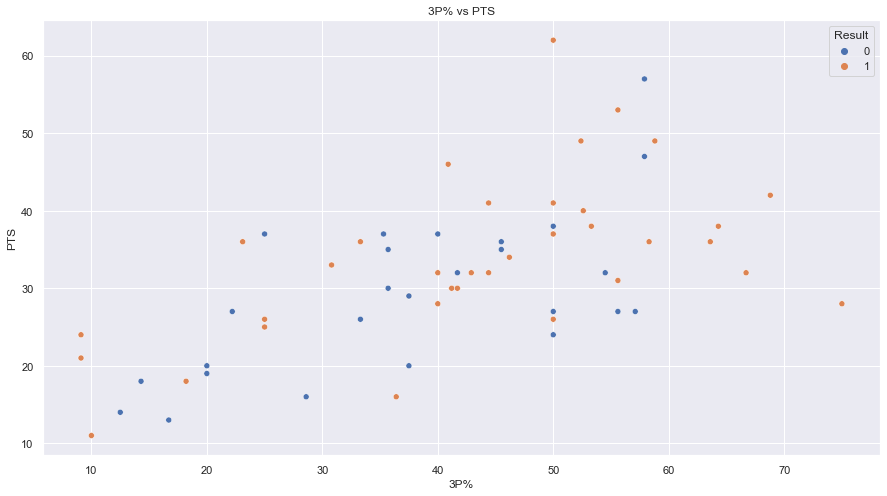

In [188]:
sns.scatterplot(data=twentyone, x='3P%', y='PTS', hue='Result');
plt.title('3P% vs PTS');

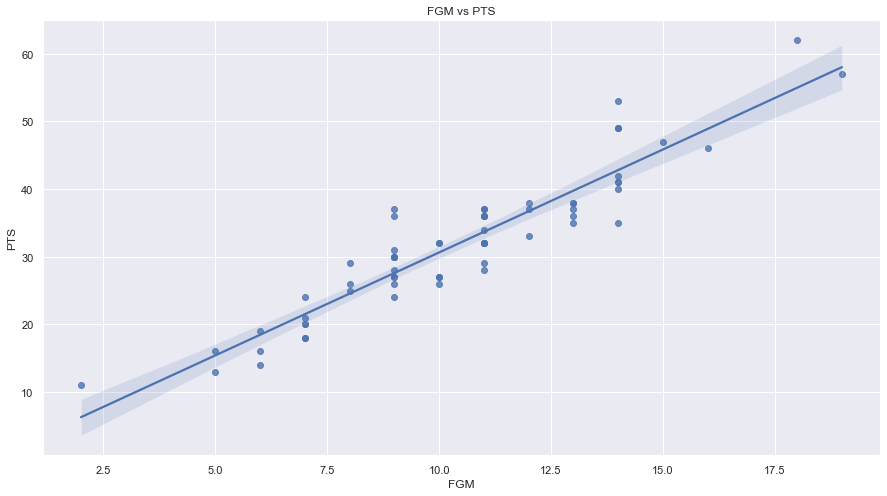

In [189]:
sns.regplot(x='FGM', y='PTS', data=twentyone);
plt.title('FGM vs PTS');

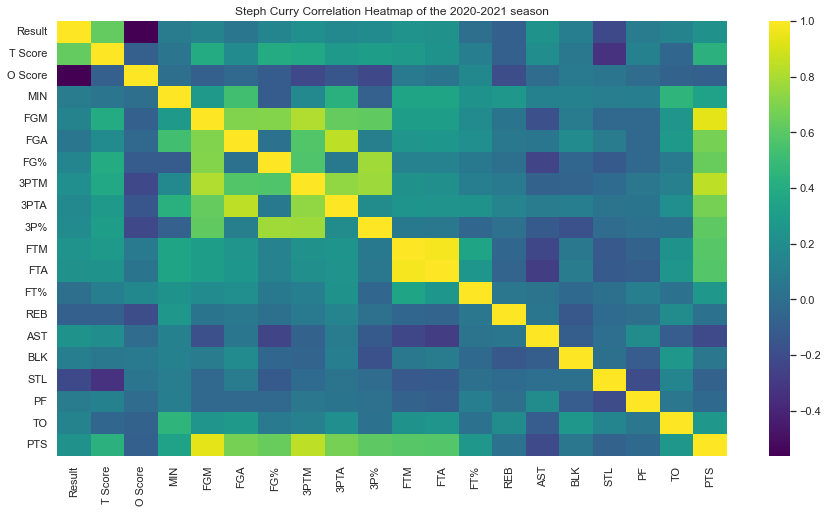

In [190]:
twenty_one_numeric = reg_szn.select_dtypes([np.number])
df_numeric_normalized = (twenty_one_numeric - twenty_one_numeric.mean()) / twenty_one_numeric.std()
correlation = twentyone.corr()
sns.heatmap(correlation, cmap='viridis');
plt.title('Steph Curry Correlation Heatmap of the 2020-2021 season');

### Regular vs Post Season analysis

In [191]:
post_szn = pd.read_csv("../data/Stephen_Curry_Postseason_Stats.csv").drop(labels='Season_div', axis=1)
post_szn_w_l_converted = post_szn['Result'].eq('W').mul(1)
post_szn['Result'] = post_szn_w_l_converted
post_szn.sort_values(by='3P%', ascending=False)


,Season_year,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
107,2018-2019,Wed 4/24,LAC,0,121,129,38.0,7-15,7,15,...,6,6,100.0,3,4,1,0,2,3,24
27,2014-2015,Sat 5/23,HOU,1,115,80,35.0,12-19,12,19,...,9,10,90.0,5,7,1,2,2,4,40
36,2014-2015,Sat 4/25,NOP,1,109,98,38.0,11-20,11,20,...,11,12,91.7,8,9,0,1,4,5,39
57,2015-2016,Sat 4/16,HOU,1,104,78,20.0,8-13,8,13,...,3,3,100.0,7,2,0,3,0,4,24
111,2018-2019,Sat 4/13,LAC,1,121,104,37.0,11-16,11,16,...,8,9,88.9,15,7,1,0,4,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2015-2016,Sun 4/24,HOU,1,121,94,19.0,2-9,2,9,...,1,1,100.0,0,5,0,1,0,5,6
23,2014-2015,Sun 6/7,CLE,0,93,95,42.0,5-23,5,23,...,7,8,87.5,6,5,0,0,4,6,19
84,2017-2018,Wed 5/16,HOU,0,105,127,34.0,7-19,7,19,...,1,1,100.0,7,7,0,0,3,2,16
108,2018-2019,Sun 4/21,LAC,1,113,105,35.0,3-14,3,14,...,5,5,100.0,10,7,0,3,4,3,12


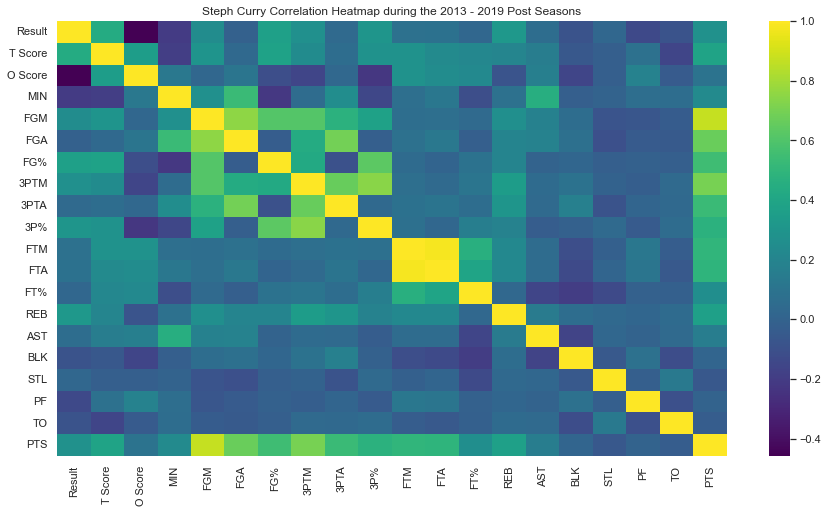

In [192]:
post_szn_numeric = post_szn.select_dtypes([np.number])
post_szn_numeric_normalized = (post_szn_numeric - post_szn_numeric.mean()) / post_szn_numeric.std()
sns.heatmap(post_szn_numeric_normalized.corr(), cmap='viridis');
plt.title('Steph Curry Correlation Heatmap during the 2013 - 2019 Post Seasons');
    

In [193]:
win_median = np.median(reg_szn[reg_szn['Result'] == 'W']['PTS'])
lose_median = np.median(reg_szn[reg_szn['Result'] == 'L']['PTS'])
print(win_median, lose_median)

25.0 21.0


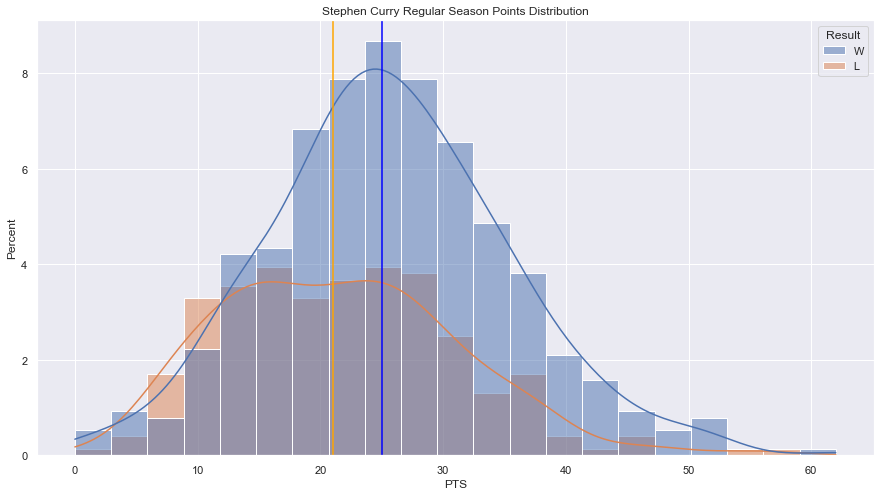

In [194]:
sns.histplot(data=reg_szn, x='PTS', stat='percent', hue='Result', kde=True);
plt.title('Stephen Curry Regular Season Points Distribution');
plt.axvline(win_median, color='Blue');
plt.axvline(lose_median, color='Orange');

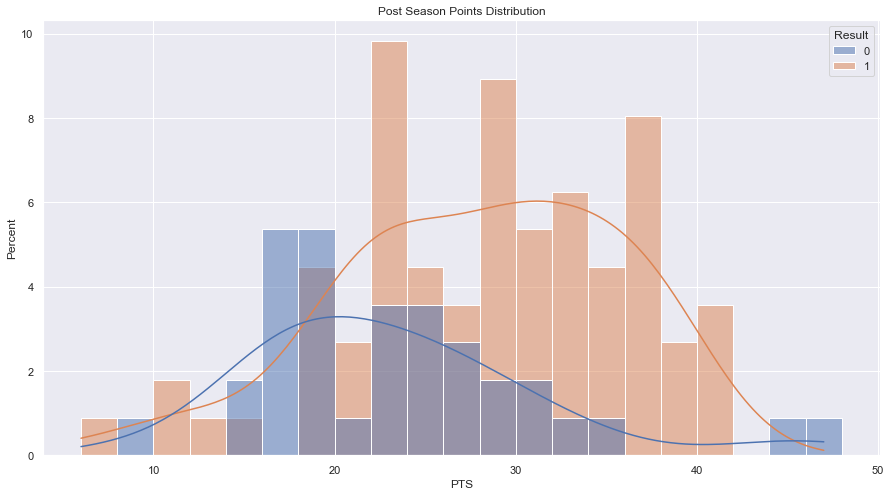

In [195]:
sns.histplot(data=post_szn, x='PTS', stat='percent', hue='Result', kde=True, binwidth=2);
plt.title('Post Season Points Distribution');

In [196]:
twentyone_sixteen = reg_szn[(reg_szn['Season_year'] == '2020-2021') | (reg_szn['Season_year'] == '2015-2016')]
twentyone_sixteen.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,AST,BLK,STL,PF,TO,PTS,AST/TO,eFG%,TS%,Game Score
415,2015-2016,Regular,Wed 4/13,MEM,W,125,104,30.0,15-24,15,...,6,0,2,2,2,46,3.00,83.333333,86.336336,42.6
416,2015-2016,Regular,Sun 4/10,SAS,W,92,86,35.0,13-22,13,...,5,0,2,4,4,37,1.25,68.181818,73.763955,31.7
417,2015-2016,Regular,Sat 4/9,MEM,W,100,99,34.0,7-22,7,...,8,0,1,1,2,17,4.00,38.636364,38.636364,17.6
418,2015-2016,Regular,Thu 4/7,SAS,W,112,101,36.0,11-19,11,...,9,0,2,2,3,27,3.00,65.789474,67.907445,27.6
419,2015-2016,Regular,Tue 4/5,MIN,L,117,124,43.0,7-25,7,...,15,0,3,4,3,21,5.00,36.000000,39.893617,21.2


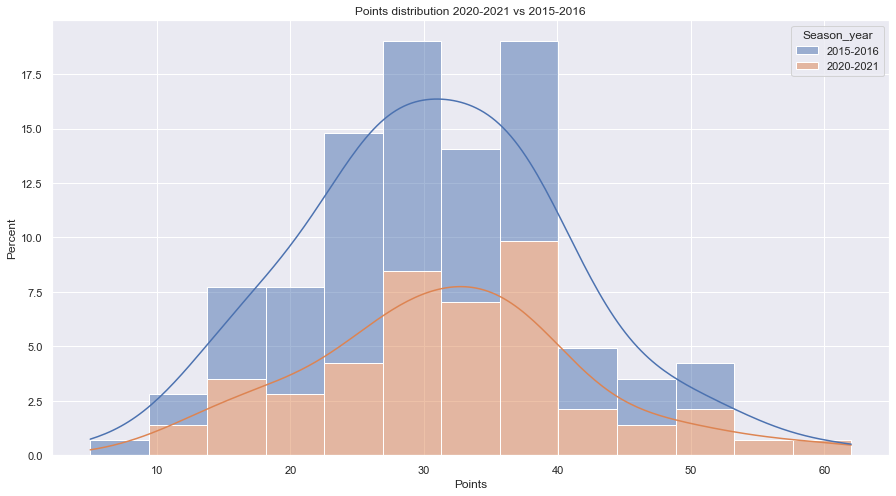

In [197]:
sns.histplot(data=twentyone_sixteen, x='PTS', stat='percent', kde=True, hue='Season_year', multiple='stack');
plt.xlabel('Points')
plt.title('Points distribution 2020-2021 vs 2015-2016');

In [198]:
reg_szn.columns

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS', 'AST/TO', 'eFG%', 'TS%', 'Game Score'],
      dtype='object')

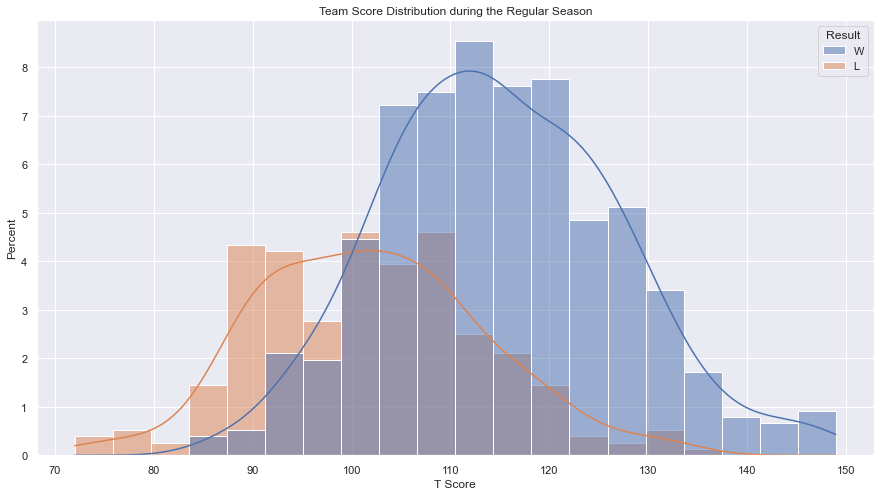

In [199]:
sns.histplot(data=reg_szn, x='T Score', stat='percent', hue='Result', kde=True);
plt.title('Team Score Distribution during the Regular Season');

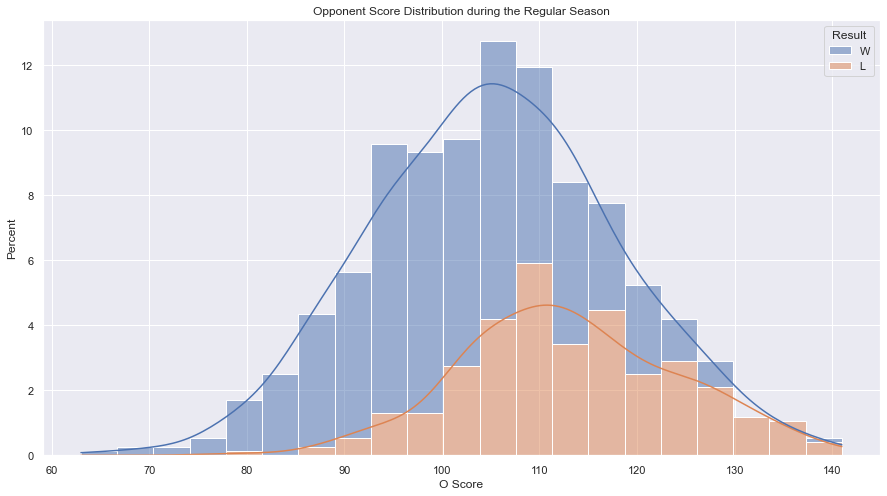

In [200]:
sns.histplot(data=reg_szn, x='O Score', stat='percent', hue='Result', kde=True, multiple='stack');
plt.title('Opponent Score Distribution during the Regular Season');

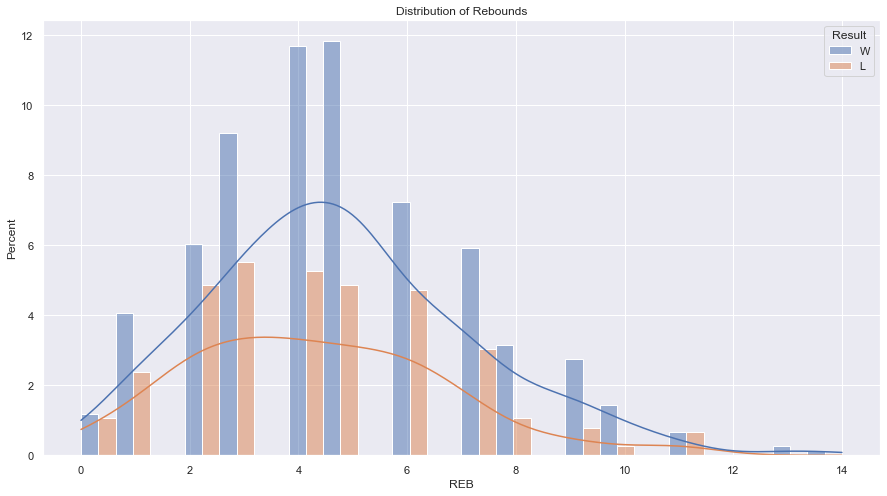

In [201]:
sns.histplot(data=reg_szn, x='REB', stat='percent', hue='Result', multiple='dodge', kde=True);
plt.title('Distribution of Rebounds');

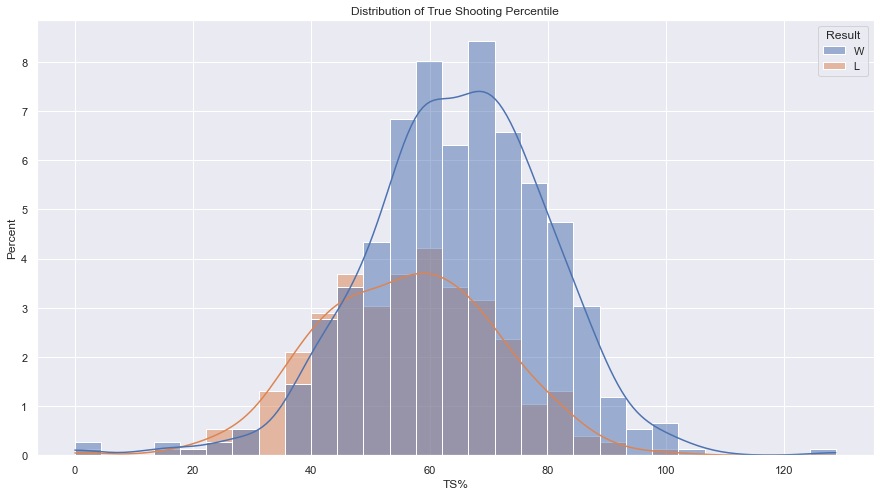

In [202]:
sns.histplot(data=reg_szn, x='TS%', hue='Result', stat='percent', kde=True);
plt.title('Distribution of True Shooting Percentile');

## Win/Loss Prediction

In [203]:
reg_szn_pred_plot = add_advanced_stats(reg_szn).dropna(axis=0)
reg_szn_pred_plot = convert_WL(reg_szn_pred_plot)

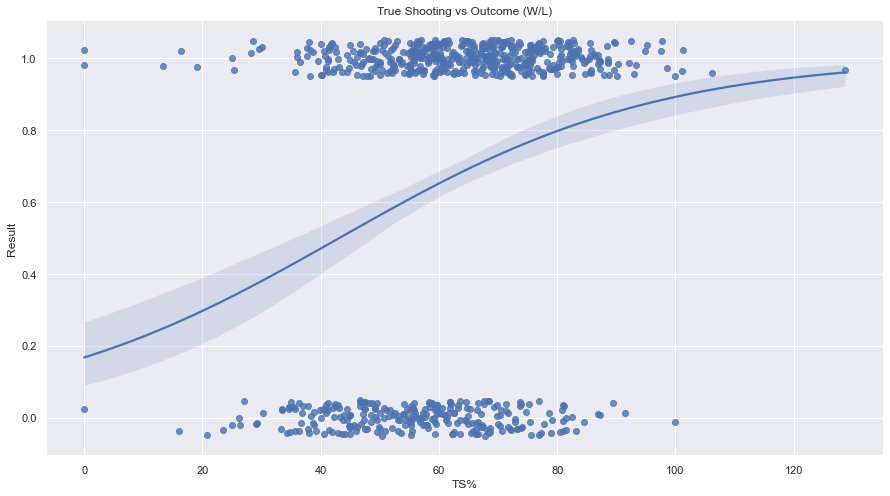

In [204]:
sns.regplot(data=reg_szn_pred_plot, x='TS%', y= 'Result', logistic=True, ci=95, y_jitter=.05);
plt.title('True Shooting vs Outcome (W/L)');

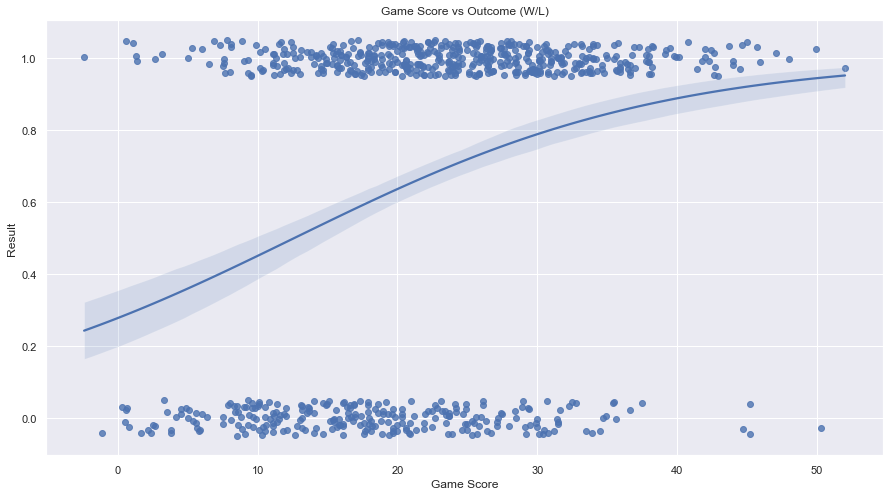

In [205]:
sns.regplot(data=reg_szn_pred_plot, x='Game Score', y= 'Result', logistic=True, ci=95, y_jitter=0.05);
plt.title('Game Score vs Outcome (W/L)');

In [206]:
def drop_columns(df):
	columns_to_drop = ['FGM', 'FGA','3PTM', '3PTA','FTM', 'FTA', '3P%', 'FT%', 'eFG%', 'FG%']
	df = df.drop(columns_to_drop, axis=1)
	return df

In [207]:
reg_szn_x = pipeline(reg_szn).dropna(axis=0).drop(['T Score', 'O Score'], axis=1)
reg_szn_x = drop_columns(reg_szn_x)

In [208]:
X = reg_szn_x.drop('Result', axis=1)
X

,MIN,REB,AST,BLK,STL,PF,TO,PTS,TS%,Game Score
0,2.248077,1.829398,0.509964,1.600215,0.240968,-1.682282,-0.614397,1.785075,0.483928,2.343154
1,1.093922,0.165116,-0.193084,-0.439590,0.240968,1.084258,-0.614397,-0.725352,-0.852755,-0.610520
2,0.104647,0.997257,0.158440,-0.439590,-0.519932,-0.299012,0.997865,0.077985,0.339148,0.166225
3,1.093922,1.829398,-0.896132,-0.439590,1.001869,1.775893,-0.076976,0.479653,0.515070,0.759003
4,1.588560,1.413328,2.619108,-0.439590,4.045469,1.084258,0.460445,0.278819,-0.020583,1.382443
...,...,...,...,...,...,...,...,...,...,...
756,-0.060232,1.413328,-0.544608,-0.439590,-1.280832,-0.990647,-1.151818,0.178402,-0.122948,0.370631
757,0.104647,0.165116,-0.193084,-0.439590,0.240968,1.775893,2.610127,0.680487,0.874407,0.186665
758,0.269527,-1.083096,-0.193084,3.640020,0.240968,-0.990647,0.460445,1.182572,0.029373,0.615919
759,-0.884628,-0.250955,-0.193084,-0.439590,-0.519932,-0.299012,-0.614397,-0.524517,-0.771088,-0.630961


In [244]:
y = reg_szn_x['Result']
y

0      1
1      0
2      1
3      0
4      1
      ..
756    0
757    1
758    1
759    0
760    0
Name: Result, Length: 760, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=30)

In [211]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr.fit(X_train, Y_train)
lr.intercept_, lr.coef_

(array([0.88877169]),
 array([[-0.63326221,  0.11715678,  0.4084865 ,  0.05922583,  0.17852577,
         -0.17265463, -0.17885282, -0.20175582,  0.34011783,  0.78559125]]))

In [212]:
train_accuracy = lr.score(X_train, Y_train)
test_accuracy = lr.score(X_test, Y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.7354
Test accuracy: 0.6842


In [213]:
Y_test_pred = lr.predict(X_test)

precision = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test_pred)
recall = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.6615
recall = 0.9556


In [214]:
arr = []
for i in range(10000):
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.15, random_state=i)
    lr = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
    lr.fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    arr.append(test_accuracy)

Average Test Accuracy = 0.7214


Text(0.5, 1.0, 'Average Test Accuracy for 10000 models.')

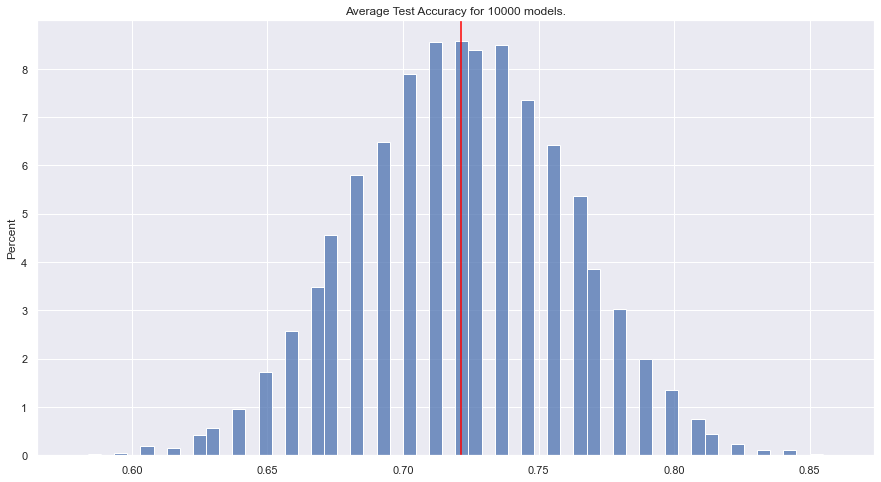

In [215]:
avg_accuracy = np.mean(arr)
print(f'Average Test Accuracy = {avg_accuracy:.4f}')
plt.axvline(avg_accuracy, color='Red');
sns.histplot(x=arr, stat='percent');
plt.title('Average Test Accuracy for 10000 models.')

## Decision Trees
___

In [216]:
decision_tree = tree.DecisionTreeClassifier(criterion="gini", random_state=30)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=30)

In [217]:
dt_training_accuracy = decision_tree.score(X_train, Y_train)
dt_testing_accuracy = decision_tree.score(X_test, Y_test)
dt_training_accuracy, dt_testing_accuracy

(1.0, 0.6929824561403509)

## Random Forest
---

In [218]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=2000, criterion='entropy', random_state=30)
random_forest_model.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=30)

In [219]:
rf_training_accuracy = random_forest_model.score(X_train, Y_train)
rf_testing_accuracy = random_forest_model.score(X_test, Y_test)
print(f'Random Forest Training Accuracy = {rf_training_accuracy:.4f}') 
print(f'Random Forest Test Accuracy = {rf_testing_accuracy:.4f}') 


Random Forest Training Accuracy = 1.0000
Random Forest Test Accuracy = 0.7807


## Gradient Boosted Decision Tree
---
Using Sklearn 

In [222]:
boosted_tree_model = ensemble.GradientBoostingClassifier(n_estimators=200, random_state=30)
boosted_tree_model.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=200, random_state=30)

In [223]:
bt_training_accuracy = boosted_tree_model.score(X_train, Y_train)
bt_testing_accuracy = boosted_tree_model.score(X_test, Y_test)
print(f'Training Accuracy = {bt_training_accuracy:.4f}') 
print(f'Test Accuracy = {bt_testing_accuracy:.4f}') 

Training Accuracy = 0.9536
Test Accuracy = 0.7719


## Per Minute Stats
___

In [239]:
reg_szn_per_minute = pipeline(reg_szn, per_minute=True).drop(['T Score', 'O Score', 'MIN'], axis=1).dropna(axis=0)
reg_szn_per_minute = drop_columns(reg_szn_per_minute)
reg_szn_per_minute

,REB,AST,BLK,STL,PF,TO,PTS,TS%,Game Score,Result
0,0.772212,-0.303991,0.750087,-0.196207,-1.578968,-0.939991,0.625235,-0.385895,1.051938,1
1,-0.178152,-0.548586,-0.356207,-0.016137,0.553818,-0.806058,-1.048912,-0.624932,-0.887004,0
2,0.953445,0.097146,-0.356207,-0.527683,-0.329765,0.965128,0.040788,0.031876,0.125357,1
3,1.236344,-1.135615,-0.356207,0.601247,1.087015,-0.346862,0.015446,-0.156498,0.276145,0
4,0.689834,1.519358,-0.356207,2.776121,0.408401,-0.012901,-0.325229,-0.430425,0.594945,1
...,...,...,...,...,...,...,...,...,...,...
756,1.465159,-0.539953,-0.356207,-1.250904,-0.935996,-1.170714,0.224144,-0.108990,0.405582,0
757,0.124954,-0.246685,-0.356207,0.195538,1.544041,2.578876,0.664198,0.246608,0.145693,1
758,-1.140795,-0.303991,2.593909,0.155359,-0.971717,0.367444,1.079805,-0.136138,0.493391,1
759,0.053533,0.180140,-0.356207,-0.378051,-0.071309,-0.426034,-0.174181,-0.154174,-0.333266,0


In [241]:
X_per_minute = reg_szn_per_minute.drop('Result', axis=1)
X_per_minute

,REB,AST,BLK,STL,PF,TO,PTS,TS%,Game Score
0,0.772212,-0.303991,0.750087,-0.196207,-1.578968,-0.939991,0.625235,-0.385895,1.051938
1,-0.178152,-0.548586,-0.356207,-0.016137,0.553818,-0.806058,-1.048912,-0.624932,-0.887004
2,0.953445,0.097146,-0.356207,-0.527683,-0.329765,0.965128,0.040788,0.031876,0.125357
3,1.236344,-1.135615,-0.356207,0.601247,1.087015,-0.346862,0.015446,-0.156498,0.276145
4,0.689834,1.519358,-0.356207,2.776121,0.408401,-0.012901,-0.325229,-0.430425,0.594945
...,...,...,...,...,...,...,...,...,...
756,1.465159,-0.539953,-0.356207,-1.250904,-0.935996,-1.170714,0.224144,-0.108990,0.405582
757,0.124954,-0.246685,-0.356207,0.195538,1.544041,2.578876,0.664198,0.246608,0.145693
758,-1.140795,-0.303991,2.593909,0.155359,-0.971717,0.367444,1.079805,-0.136138,0.493391
759,0.053533,0.180140,-0.356207,-0.378051,-0.071309,-0.426034,-0.174181,-0.154174,-0.333266


In [246]:
X_pm_train, X_pm_test, Y_pm_train, Y_pm_test = train_test_split(X_per_minute,y, test_size=0.1, random_state=30)

In [248]:
lr.fit(X_pm_train, Y_pm_train)
lr.intercept_, lr.coef_

(array([0.9128122]),
 array([[ 0.11275681,  0.39282231,  0.0598966 ,  0.19852396, -0.13661428,
         -0.14867467, -0.26857697,  0.70094848,  0.86397659]]))

In [249]:
train_accuracy = lr.score(X_pm_train, Y_pm_train)
test_accuracy = lr.score(X_pm_test, Y_pm_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.7295
Test accuracy: 0.6842
